## Calculating the Return of a Portfolio of Securities

This is the data for analyzing the return of 3 stocks securities. Do it for Astra International, ABM Investama and Telkomsel Indonesia for the period ‘2000-1-1’ until today.

In [1]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

,GS10
DATE,
2010-01-01,3.73
2010-02-01,3.69
2010-03-01,3.73
2010-04-01,3.85
2010-05-01,3.42
2010-06-01,3.20
2010-07-01,3.01
2010-08-01,2.70
2010-09-01,2.65


In [2]:
from pandas_datareader.compat import is_list_like

from pandas import concat, read_csv

from pandas_datareader.base import _BaseReader


In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['ASII.JK', 'ABMM.JK', 'TLKM.JK']
Astra_ABM_TLKM = pd.DataFrame()
for t in tickers:
    Astra_ABM_TLKM[t] = wb.DataReader(t,
                data_source='yahoo', 
                start ='1997-1-1')['Adj Close']

Astra_ABM_TLKM.head()

ImmediateDeprecationError: 
Yahoo Daily has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
Astra_ABM_TLKM.info()

In [7]:
Astra_ABM_TLKM.head()

,ASII.JK,PG,MSFT
Date,,,
2000-10-17,3.650432,21.142250,18.531223
2000-10-18,3.537765,21.746418,19.013447
2000-10-19,3.620398,21.255072,22.733469
2000-10-20,3.455150,21.218683,23.950518
2000-10-23,3.417594,20.254194,22.825319


In [8]:
Astra_ABM_TLKM.tail()

,ASII.JK,PG,MSFT
Date,,,
2018-04-26,7325.0,72.750000,94.260002
2018-04-27,7325.0,72.809998,95.820000
2018-04-30,7150.0,72.339996,93.519997
2018-05-01,7150.0,71.959999,95.000000
2018-05-09,7100.0,NaN,NaN


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [9]:
Astra_ABM_TLKM.iloc[0]

ASII.JK     3.650432
PG         21.142250
MSFT       18.531223
Name: 2000-10-17 00:00:00, dtype: float64

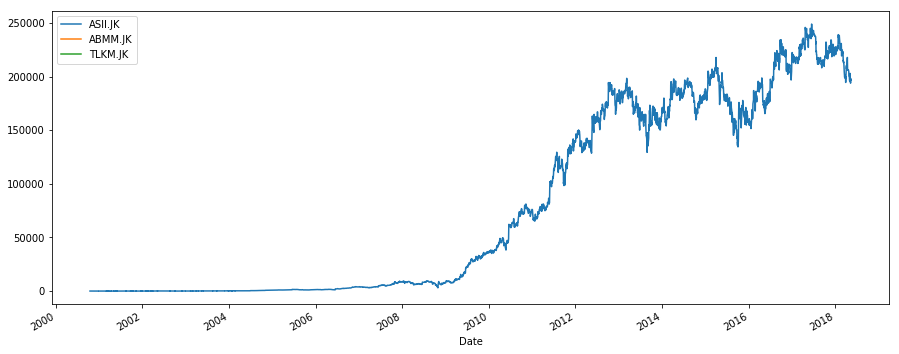

In [20]:
(Astra_ABM_TLKM / 
 Astra_ABM_TLKM.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [11]:
returns = (Astra_ABM_TLKM / Astra_ABM_TLKM.shift(1)) - 1
returns.head()

,ASII.JK,ABMM.JK,TLKM.JK
Date,,,
2000-10-17,NaN,NaN,NaN
2000-10-18,-0.030864,NaN,NaN
2000-10-19,0.023358,NaN,NaN
2000-10-20,-0.045644,NaN,NaN
2000-10-23,-0.010870,NaN,NaN


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [16]:
weights = np.array([0.33, 0.33, 0.33])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [17]:
annual_returns = returns.mean() * 250
annual_returns

ASII.JK    0.586154
ABMM.JK   -0.030125
TLKM.JK    0.288682
dtype: float64

In [18]:
np.dot(annual_returns, weights)

0.27875457649791413

Transform the result into a percentage form. 

In [19]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

27.900000000000002 %


Is the return of this portfolio satisfactory?